# Importing libraries

In [882]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [883]:
data=pd.read_csv('train_jqd04QH.csv')     #reading data
#data=pd.read_csv('test_KaymcHn.csv')

In [884]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [885]:
data.dtypes         #data types

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

## Exploratory Data Analysis before handling missing values

In [886]:
import seaborn as sns
import matplotlib.pyplot as plt

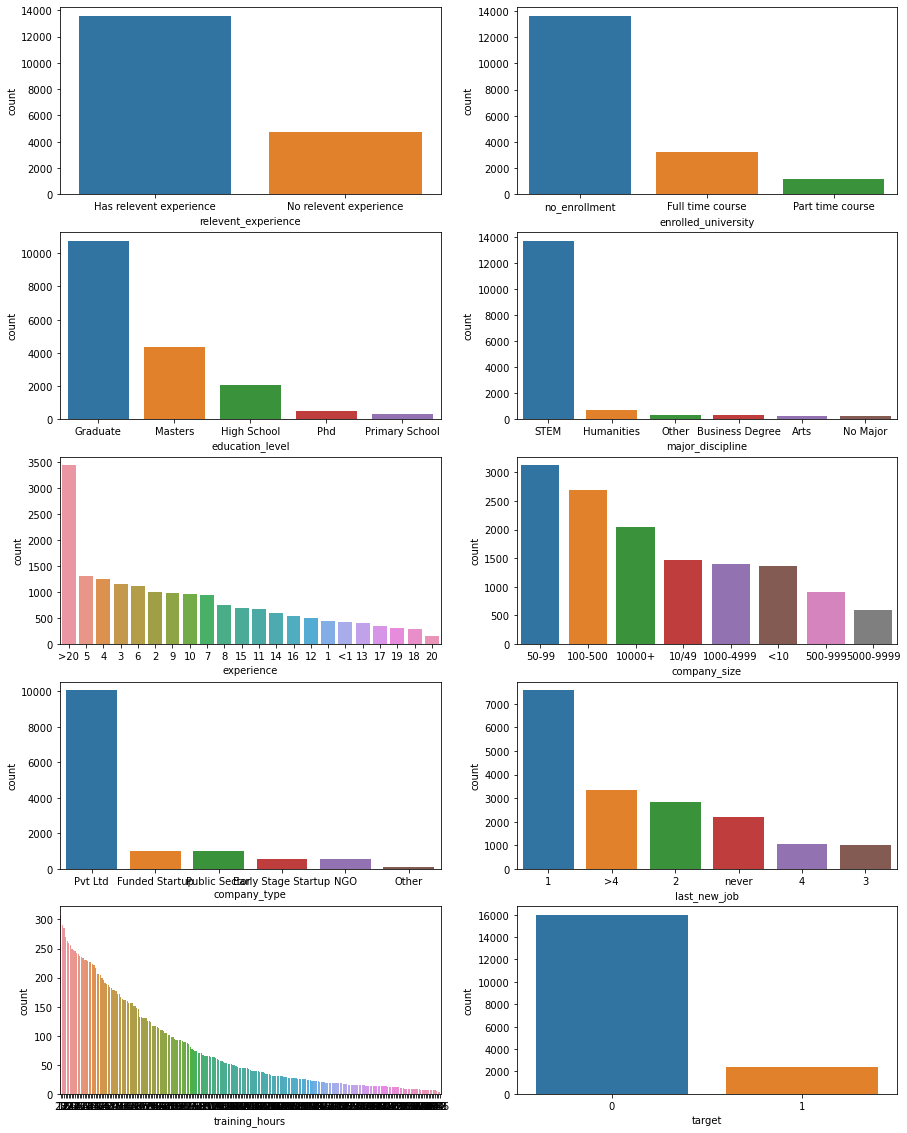

In [887]:
fig, axs = plt.subplots(nrows=5, ncols=2,figsize=(15,20))
for i, var in enumerate(data.columns[4:14]):  #enumerate generates tuple like(iter_no,column_name)
    row = i//2   #Mention column no as denominator
    pos = i % 2  #Mention column no as denominator
    plot = sns.countplot(x=var, order = data[var].value_counts().index,data=data, ax=axs[row][pos])

## Missing values in data

In [888]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [889]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [890]:
data.shape

(18359, 14)

In [891]:
columns=list(data)
for i in columns:
    print('--------------------------')
    print(data[i].value_counts())
    print('---------------------------')

--------------------------
2047     1
2660     1
31322    1
29275    1
19036    1
        ..
5336     1
31957    1
29908    1
19667    1
6147     1
Name: enrollee_id, Length: 18359, dtype: int64
---------------------------
--------------------------
city_103    4358
city_21     1672
city_16     1654
city_114    1472
city_160     827
            ... 
city_121       3
city_111       3
city_129       3
city_171       2
city_140       1
Name: city, Length: 123, dtype: int64
---------------------------
--------------------------
0.920    5185
0.624    1672
0.910    1654
0.926    1472
0.698     655
         ... 
0.487       4
0.649       4
0.781       3
0.625       3
0.664       2
Name: city_development_index, Length: 93, dtype: int64
---------------------------
--------------------------
Male      12884
Female     1188
Other       189
Name: gender, dtype: int64
---------------------------
--------------------------
Has relevent experience    13596
No relevent experience      4763
Name: rele

In [892]:
data.gender.value_counts()

Male      12884
Female     1188
Other       189
Name: gender, dtype: int64

In [893]:
data.gender.isnull().sum()

4098

In [894]:
data.gender[data['gender'].isnull()]='Male'          #mode

C:\Users\Phaneendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [895]:
data.enrolled_university.value_counts()

no_enrollment       13659
Full time course     3187
Part time course     1171
Name: enrolled_university, dtype: int64

In [896]:
data.enrolled_university.isnull().sum()

342

In [897]:
data.enrolled_university[data['enrolled_university'].isnull()]='no_enrollment'         #mode

C:\Users\Phaneendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [898]:
data.education_level.value_counts()

Graduate          10769
Masters            4319
High School        2032
Phd                 459
Primary School      323
Name: education_level, dtype: int64

In [899]:
data.education_level.isnull().sum()

457

In [900]:
data.education_level[data['education_level'].isnull()]='Graduate'       #mode

C:\Users\Phaneendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [901]:
data.major_discipline.value_counts()

STEM               13738
Humanities           688
Other                343
Business Degree      307
Arts                 239
No Major             206
Name: major_discipline, dtype: int64

In [902]:
data.major_discipline[data['major_discipline'].isnull()]='STEM'

C:\Users\Phaneendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [903]:
data.experience.value_counts()

>20    3437
5      1309
4      1250
3      1159
6      1125
2       992
9       979
10      967
7       950
8       755
15      695
11      667
14      602
16      549
12      497
1       452
<1      416
13      412
17      347
19      308
18      286
20      146
Name: experience, dtype: int64

In [904]:
data.experience.isnull().sum()

59

In [905]:
data['experience']=data['experience'].str.replace('>20','20')

In [906]:
data['experience']=data['experience'].str.replace('<1','0')

In [908]:
data['experience']=data['experience'].astype('int')

## Feature Engineering

In [909]:
data['exp<7'] = data['experience'].map(lambda t: 1 if t<7 else 0)
data['exp>7 and <14'] = data['experience'].map(lambda t: 1 if t>7 and t<14 else 0)
data['exp>14'] = data['experience'].map(lambda t: 1 if t>14 else 0)


In [910]:
data=data.drop('experience',axis=1)

In [907]:
data.experience[data['experience'].isnull()]='20'

C:\Users\Phaneendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [911]:
data.company_size.value_counts()

50-99        3120
100-500      2698
10000+       2044
10/49        1466
1000-4999    1399
<10          1360
500-999       902
5000-9999     591
Name: company_size, dtype: int64

In [912]:
data['company_size']=data['company_size'].str.replace('10000+','very_big')
data['company_size']=data['company_size'].str.replace('5000-9999','big')
data['company_size']=data['company_size'].str.replace('1000-4999','medium')
data['company_size']=data['company_size'].str.replace('500-999','small')
data['company_size']=data['company_size'].str.replace('100-500','very_small')
data['company_size']=data['company_size'].str.replace('50-99','tiny')
data['company_size']=data['company_size'].str.replace('10/49','tiny')
data['company_size']=data['company_size'].str.replace('<10','tiny')
data['company_size']=data['company_size'].str.replace('NaN','missing')

In [913]:
data.company_size.isnull().sum()

4779

In [914]:
4779/18000

0.2655

In [915]:
data.company_type.value_counts()

Pvt Ltd                10051
Funded Startup          1038
Public Sector            996
Early Stage Startup      582
NGO                      534
Other                    119
Name: company_type, dtype: int64

In [916]:
data.company_type[data['company_type'].isnull()]='Pvt Ltd'

C:\Users\Phaneendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [917]:
data.last_new_job.value_counts()

1        7567
>4       3339
2        2835
never    2186
4        1038
3        1027
Name: last_new_job, dtype: int64

In [918]:
data.last_new_job.isnull().sum()

367

In [919]:
data.last_new_job[data['last_new_job'].isnull()]='1'

C:\Users\Phaneendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [920]:
data.shape

(18359, 16)

In [921]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target', 'exp<7', 'exp>7 and <14', 'exp>14'],
      dtype='object')

## EDA after handling missing values

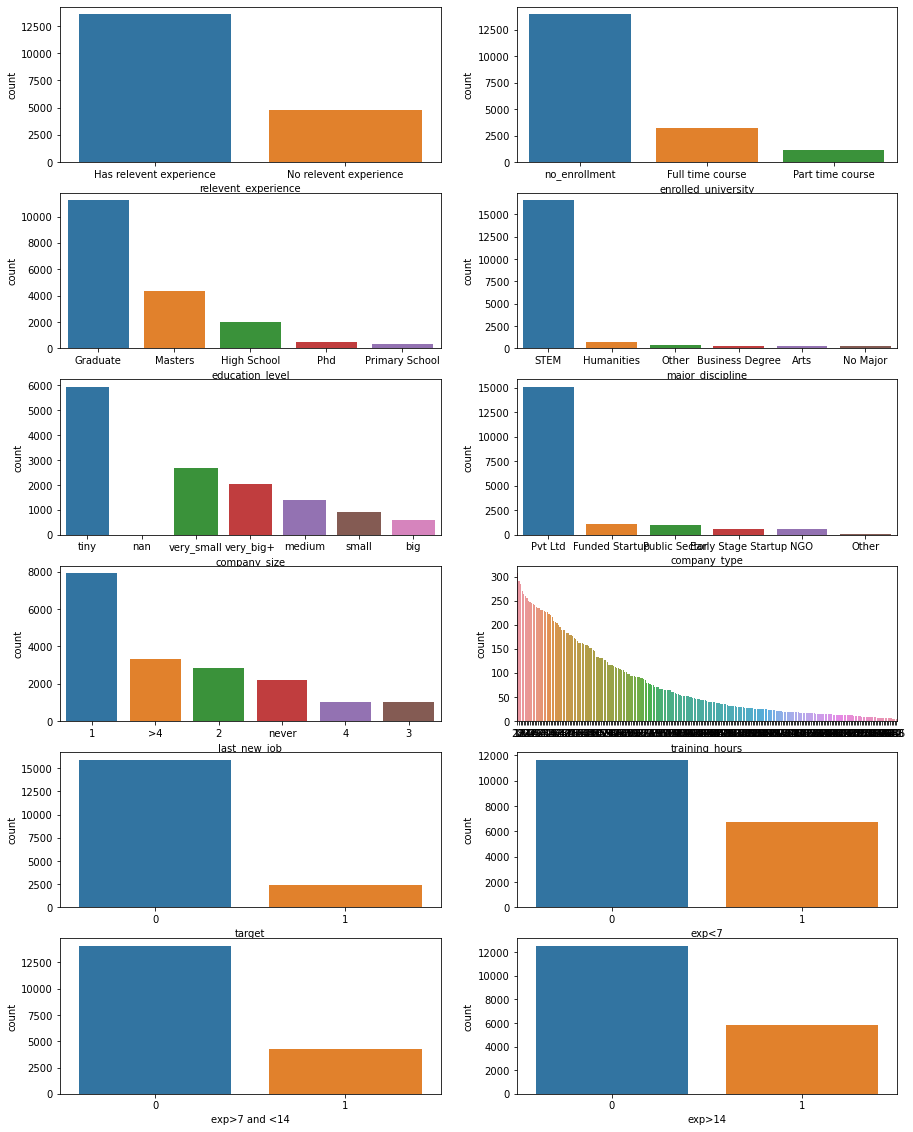

In [922]:
fig, axs = plt.subplots(nrows=6, ncols=2,figsize=(15,20))
for i, var in enumerate(data.columns[4:17]):  #enumerate generates tuple like(iter_no,column_name)
    row = i//2   #Mention column no as denominator
    pos = i % 2  #Mention column no as denominator
    plot = sns.countplot(x=var, order = data[var].value_counts(dropna=False).index,data=data, ax=axs[row][pos])

In [923]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target', 'exp<7', 'exp>7 and <14', 'exp>14'],
      dtype='object')

In [924]:
data.dtypes=='object'               #checking for categorical variables

enrollee_id               False
city                       True
city_development_index    False
gender                     True
relevent_experience        True
enrolled_university        True
education_level            True
major_discipline           True
company_size               True
company_type               True
last_new_job               True
training_hours            False
target                    False
exp<7                     False
exp>7 and <14             False
exp>14                    False
dtype: bool

## dummies

In [925]:
cols=pd.get_dummies(data[['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_size','company_type','last_new_job']])

In [926]:
cols

,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0,1,0,1,0,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
1,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
18355,0,1,0,0,1,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
18356,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
18357,0,1,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0


In [927]:
data=pd.concat([data,cols],axis=1)

In [748]:
#y=data[['target']]

In [265]:
#x=data.drop(['enrollee_id','city','gender','target','relevent_experience','enrolled_university','education_level','major_discipline','company_size','company_type','last_new_job','city'],axis=1)

In [210]:
#test=data.drop(['enrollee_id','city','gender','relevent_experience','enrolled_university','education_level','major_discipline','company_size','company_type','last_new_job','city'],axis=1)

In [928]:
x=data.drop(['enrollee_id','city','gender','relevent_experience','enrolled_university','education_level','major_discipline','company_size','company_type','last_new_job','city'],axis=1)

In [929]:
x.shape

(18359, 43)

In [613]:
y['target'].value_counts()

1    15934
0    15934
Name: target, dtype: int64

In [930]:
from sklearn.utils import resample

## Handling imbalanced data (upsampling)

In [931]:
# Separate majority and minority classes
df_majority = x[x.target==0]
df_minority = x[x.target==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=15934,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
p = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
p.target.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

1    15934
0    15934
Name: target, dtype: int64

In [932]:
p.shape

(31868, 43)

In [933]:
p.columns

Index(['city_development_index', 'training_hours', 'target', 'exp<7',
       'exp>7 and <14', 'exp>14', 'gender_Female', 'gender_Male',
       'gender_Other', 'relevent_experience_Has relevent experience',
       'relevent_experience_No relevent experience',
       'enrolled_university_Full time course',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_Graduate',
       'education_level_High School', 'education_level_Masters',
       'education_level_Phd', 'education_level_Primary School',
       'major_discipline_Arts', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM', 'company_size_big',
       'company_size_medium', 'company_size_small', 'company_size_tiny',
       'company_size_very_big+', 'company_size_very_small',
       'company_type_Early Stage Startup', 'company_type_Funded Startup',
       'company_type_NGO',

In [934]:
y=p[['target']]

In [935]:
x=p.drop('target',axis=1)

In [936]:
x.shape

(31868, 42)

In [937]:
y.shape

(31868, 1)

## Train and Test split

In [938]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [939]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [940]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

## Hyperparameter tuning using grid search cv

In [163]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(x_train,y_train)

print_results(cv)

C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: 

C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: 

C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: 

C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: 

BEST PARAMS: {'max_depth': None, 'n_estimators': 50}

0.583 (+/-0.017) for {'max_depth': 2, 'n_estimators': 5}
0.594 (+/-0.012) for {'max_depth': 2, 'n_estimators': 50}
0.595 (+/-0.013) for {'max_depth': 2, 'n_estimators': 250}
0.594 (+/-0.016) for {'max_depth': 4, 'n_estimators': 5}
0.608 (+/-0.012) for {'max_depth': 4, 'n_estimators': 50}
0.608 (+/-0.01) for {'max_depth': 4, 'n_estimators': 250}
0.629 (+/-0.011) for {'max_depth': 8, 'n_estimators': 5}
0.648 (+/-0.01) for {'max_depth': 8, 'n_estimators': 50}
0.652 (+/-0.007) for {'max_depth': 8, 'n_estimators': 250}
0.769 (+/-0.017) for {'max_depth': 16, 'n_estimators': 5}
0.821 (+/-0.011) for {'max_depth': 16, 'n_estimators': 50}
0.822 (+/-0.012) for {'max_depth': 16, 'n_estimators': 250}
0.887 (+/-0.008) for {'max_depth': 32, 'n_estimators': 5}
0.918 (+/-0.005) for {'max_depth': 32, 'n_estimators': 50}
0.919 (+/-0.004) for {'max_depth': 32, 'n_estimators': 250}
0.887 (+/-0.01) for {'max_depth': None, 'n_estimators': 5}
0.919 (+/-0.0

In [214]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(x,y)

print_results(cv)

C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

BEST PARAMS: {'learning_rate': 1, 'max_depth': 9, 'n_estimators': 500}

0.569 (+/-0.016) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.578 (+/-0.014) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.593 (+/-0.014) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.601 (+/-0.016) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.596 (+/-0.017) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.598 (+/-0.017) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.611 (+/-0.015) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.622 (+/-0.012) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.603 (+/-0.014) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.618 (+/-0.013) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.642 (+/-0.016) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.664 (+/-0.006) for {'learning_rat

## Gradient Boosting

In [941]:
model=GradientBoostingClassifier(max_depth=9,n_estimators=500,learning_rate=1)
model.fit(x_train,y_train)
pred=model.predict(x_test)

C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [942]:
from sklearn.metrics import accuracy_score,roc_auc_score
score=accuracy_score(y_test,pred)
score_auc=roc_auc_score(y_test,pred)

## Accuracy and roc_auc_score

In [944]:
print(score)
print(score_auc)

0.9490639054492208
0.9488935466133352


## confusion matrix

In [945]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,pred)
c

array([[4309,  453],
       [  34, 4765]], dtype=int64)

## Logistic Regression

In [946]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)
p1=model1.predict(x_test)

C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Accuracy and roc_auc_score

In [947]:
from sklearn.metrics import accuracy_score,roc_auc_score
score=accuracy_score(y_test,p1)
score_auc=roc_auc_score(y_test,p1)

In [948]:
print(score)
print(score_auc)

0.6091413032109612
0.6092184261753397


## confusion matrix

In [949]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,p1)
c

array([[2996, 1766],
       [1971, 2828]], dtype=int64)

## Random Forest Classifier

In [950]:
model=RandomForestClassifier(max_depth=32,n_estimators=250)
model.fit(x_train,y_train)
p=model.predict(x_test)

C:\Users\Phaneendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


## Accuracy and auc_roc_score

In [951]:
from sklearn.metrics import accuracy_score,roc_auc_score
score=accuracy_score(y_test,p)
score_auc=roc_auc_score(y_test,p)

In [952]:
print(score)
print(score_auc)

0.9413241292751804
0.9411301782299424


## confusion matrix

In [953]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,p)
c

array([[4243,  519],
       [  42, 4757]], dtype=int64)

## From the all above models Gradient Boosting is giving the best results So we will use   Gradient Boosting for test Data

In [954]:
data1=pd.read_csv('test_KaymcHn.csv')

In [169]:
model=GradientBoostingClassifier(max_depth=9,n_estimators=500,learning_rate=1)
model.fit(x,y)
pred=model.predict(test)

C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [216]:
output=pd.DataFrame({'enrollee_id':data1.enrollee_id,'target':pred})
output.to_csv('now.csv')